## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'國家':['Taiwan','Chine','United States'] ,
        '人口':np.random.randint(10000000000,15000000000,size=3)}
data = pd.DataFrame(data)

In [3]:
data['國家'][data.人口==data.人口.max()]

1    Chine
Name: 國家, dtype: object

In [4]:
data

,國家,人口
0,Taiwan,13027986688
1,Chine,13736940491
2,United States,13182530390


In [5]:
country = ['Taiwan','Chine','United States']
population = np.random.randint(10000000000,15000000000,size=3)

list_labels = ['國家', '人口']
list_cols = [country, population]

zipped = list(zip(list_labels, list_cols))
data_2 = pd.DataFrame(dict(zipped))

In [6]:
data_2['國家'][data_2.人口==data_2.人口.max()]

1    Chine
Name: 國家, dtype: object

In [7]:
data_2

,國家,人口
0,Taiwan,13401766788
1,Chine,14659658715
2,United States,12389560880


## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [8]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [9]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [10]:
data

"n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg\nn00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg\nn00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg\nn00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg\nn00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg\nn00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg\nn00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg\nn00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg\nn00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg\nn00015388_514\thttp://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg\nn00015388_671\thttp://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg\nn00015388_686

In [11]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [12]:
import pandas as pd

arrange_data = []

for line in data:
    line = line.split('\t') # 將每句最後的 /n 取代成空值後，再以逗號斷句
    arrange_data .append(line)

    
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [13]:
df.columns=['ID','PURL']

In [14]:
df.head()

,ID,PURL
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [15]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,"PURL"]
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [16]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for i in url_list:
        try:
             img_list.append( Image.open(BytesIO(requests.get(i).content)))
        except Exception as e:
             print(e)

    return img_list

cannot identify image file <_io.BytesIO object at 0x11cd60a40>
Total images that we got: 4 


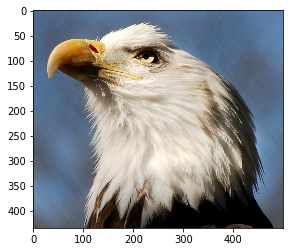

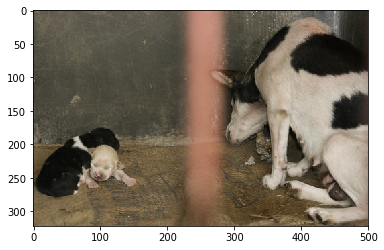

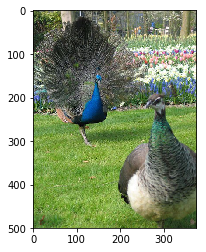

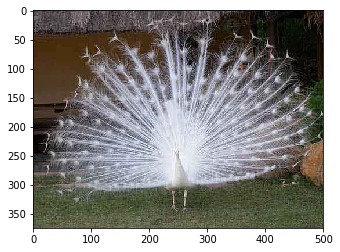

In [85]:
result = img2arr_fromURLs(df[0:5]['PURL'].values)
   
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()